In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
#Checking the shape of our dataset
df.shape

(112634, 17)

In [5]:
#Checking basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [6]:
#Checking Handling Duplicate values
df.duplicated().sum()
df.drop_duplicates(inplace=True)

There are no duplicate entries in our dataset

In [7]:
#Checking for missing values
df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


Since the number of missing values in our dataset is relatively small, we should drop it, but dropping it would make us loose significant information for other states, so we fill them.

In [8]:
# Fill missing 'Model' based on 'Make' with the most frequent model
df['Model'] = df.groupby('Make')['Model'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Fill missing 'Legislative District' based on the mode of state
df['Legislative District'] = df.groupby('State')['Legislative District'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Drop 'Vehicle Location' column
df.drop(columns='Vehicle Location', inplace=True)

# Fill missing 'Electric Utility' based on city
df['Electric Utility'] = df.groupby('City')['Electric Utility'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Verify cleaning
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [9]:
#Basic statistics for numerical variables

def num_summary_stat(df):
    # Selecting only numerical columns
    num_col = df.select_dtypes(include=['number'])

    #Generating summary stats
    sum_stat = num_col.describe().T

    #Adding other statistical measures
    sum_stat['median'] = num_col.median()
    sum_stat['kurtosis'] = num_col.kurt()
    sum_stat['skewness'] = num_col.skew()
    return sum_stat

description = num_summary_stat(df)
description

,count,mean,std,min,25%,50%,75%,max,median,kurtosis,skewness
Postal Code,112634.0,9.815623e+04,2.648733e+03,1.730000e+03,9.805200e+04,9.811900e+04,9.837000e+04,9.970100e+04,9.811900e+04,820.874840,-27.955285
Model Year,112634.0,2.019003e+03,2.892364e+00,1.997000e+03,2.017000e+03,2.020000e+03,2.022000e+03,2.023000e+03,2.020000e+03,-0.001160,-0.817579
Electric Range,112634.0,8.781299e+01,1.023342e+02,0.000000e+00,0.000000e+00,3.200000e+01,2.080000e+02,3.370000e+02,3.200000e+01,-0.876312,0.817103
Base MSRP,112634.0,1.793440e+03,1.078375e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05,0.000000e+00,371.695682,10.100497
DOL Vehicle ID,112634.0,1.994567e+08,9.398427e+07,4.777000e+03,1.484142e+08,1.923896e+08,2.191899e+08,4.792548e+08,1.923896e+08,2.466286,1.149258
2020 Census Tract,112634.0,5.296650e+10,1.699104e+09,1.101001e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10,5.303303e+10,645.898401,-25.013927


In [10]:
# Basic statistics for categorical variables

def cat_summary_stat(df):
    # Selecting only categorical columns
    cat_cols = df.select_dtypes(include=['object'])

    #Summary statistic
    cat_sum_stat = cat_cols.describe().T

    return cat_sum_stat

cat_desc = cat_summary_stat(df)
cat_desc

,count,unique,top,freq
VIN (1-10),112634,7548,5YJYGDEE9M,472
County,112634,165,King,59000
City,112634,629,Seattle,20305
State,112634,45,WA,112348
Make,112634,34,TESLA,52078
Model,112634,114,MODEL 3,23135
Electric Vehicle Type,112634,2,Battery Electric Vehicle (BEV),86044
Clean Alternative Fuel Vehicle (CAFV) Eligibility,112634,3,Clean Alternative Fuel Vehicle Eligible,58639
Legislative District,112634.0,50.0,41.0,7605.0
Electric Utility,112634,74,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),40249


In [11]:
df = df.sort_values(by='Model Year', ascending=True)

# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

In [37]:
def univariate_categorical(data, column):
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=column, palette='tab10')
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=75)
    plt.show()

<ipython-input-37-93cd3f86cfe7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




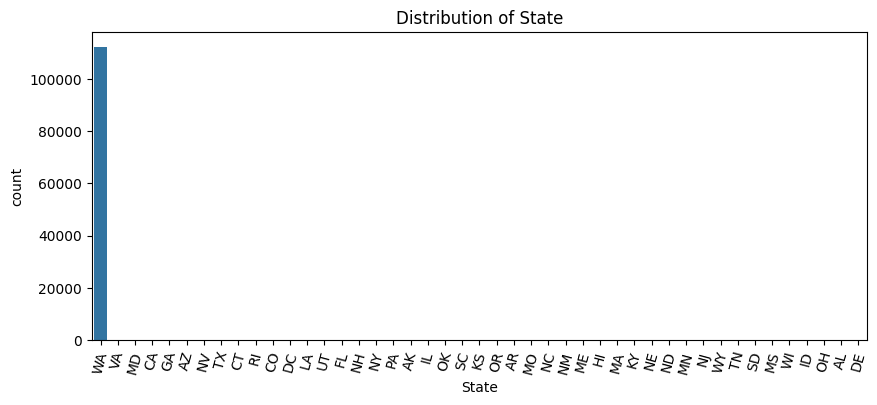

<ipython-input-37-93cd3f86cfe7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




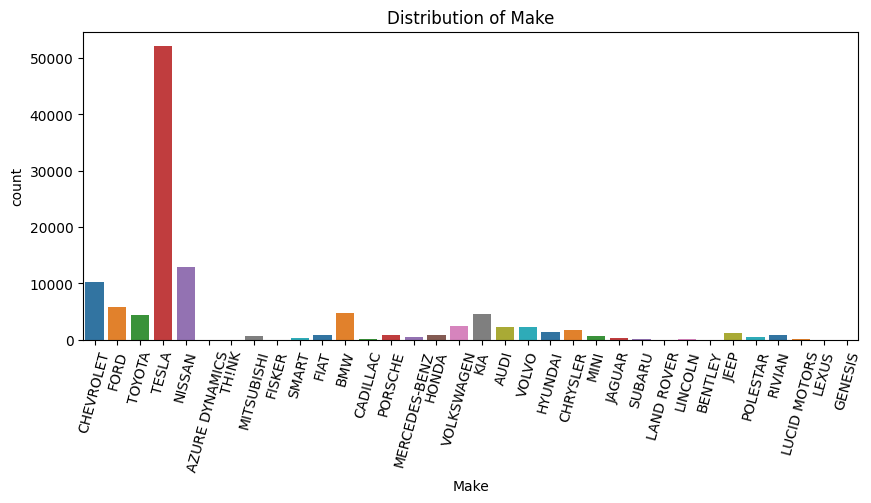

<ipython-input-37-93cd3f86cfe7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




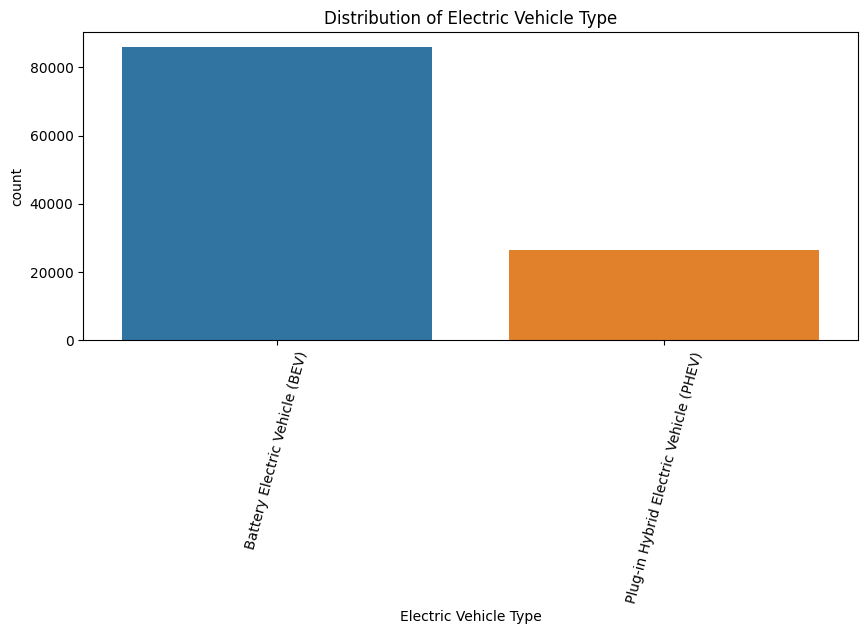

<ipython-input-37-93cd3f86cfe7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




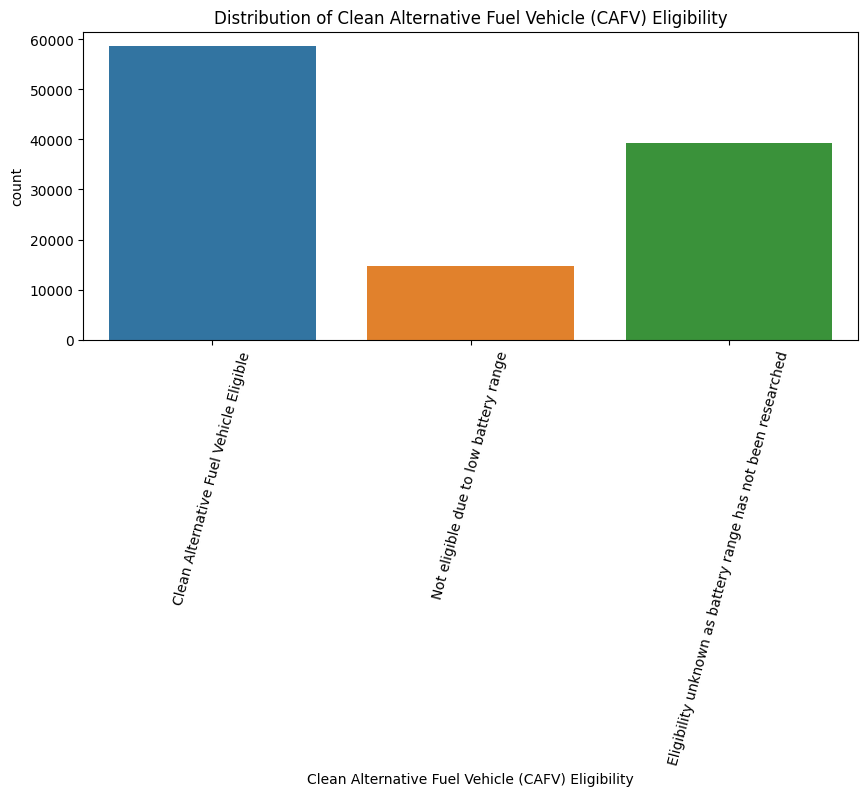

<ipython-input-37-93cd3f86cfe7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




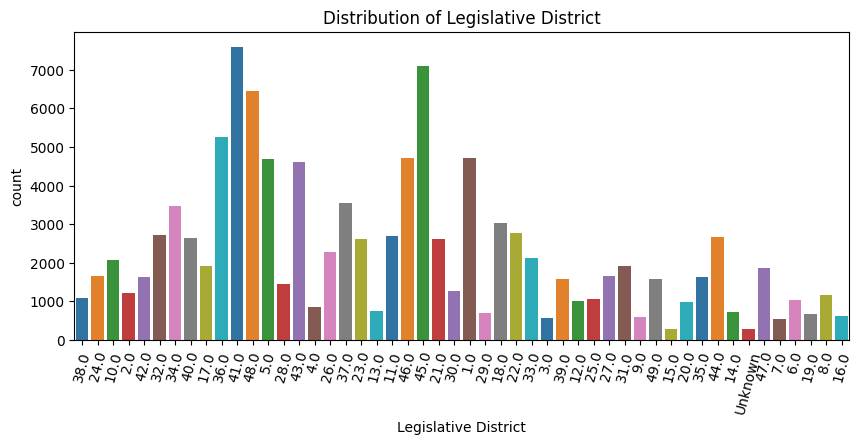

In [38]:
# Univariate Analysis on Categorical and Numerical Columns
cat_col = ['State','Make','Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Legislative District']
for col in cat_col:
    univariate_categorical(df, col)

In [15]:
def univariate_numerical(data, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {column}")
    plt.show()

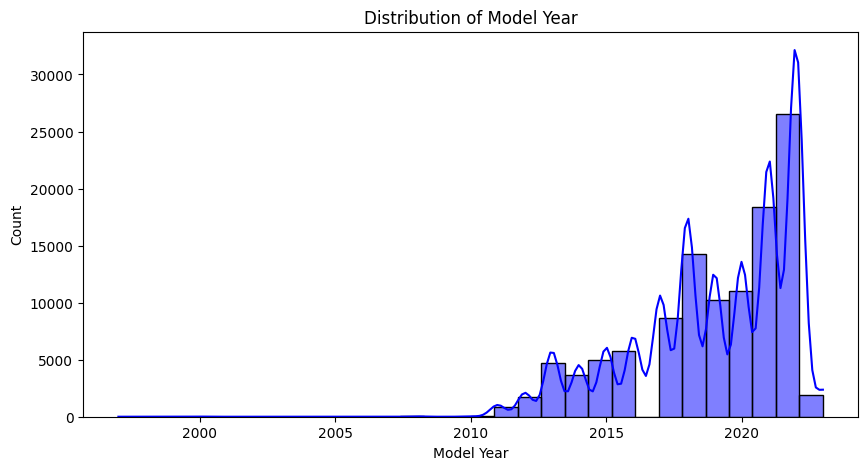

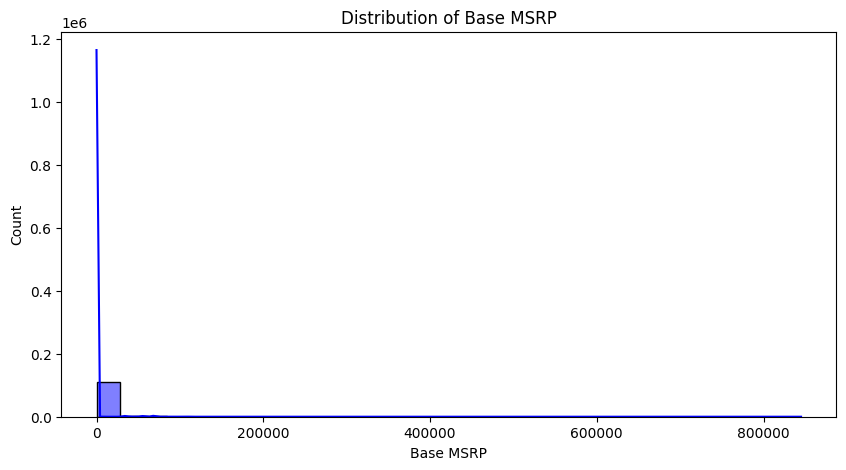

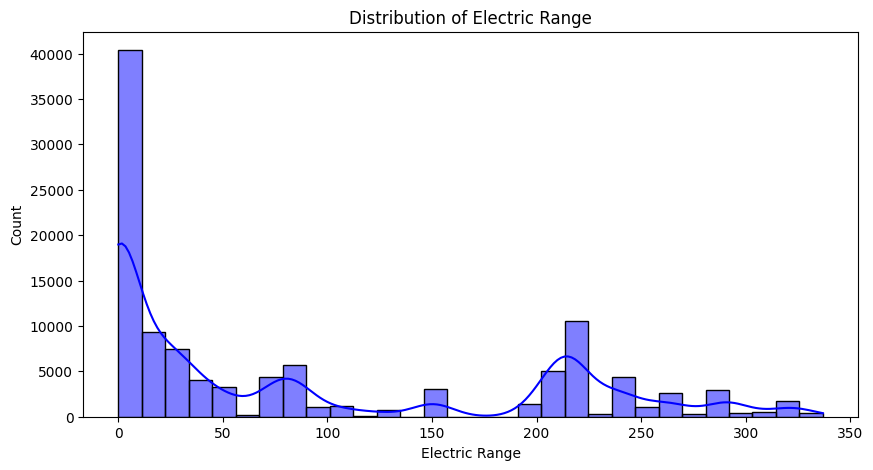

In [16]:
num_col = ['Model Year','Base MSRP','Electric Range']
for col in num_col:
    univariate_numerical(df, col)

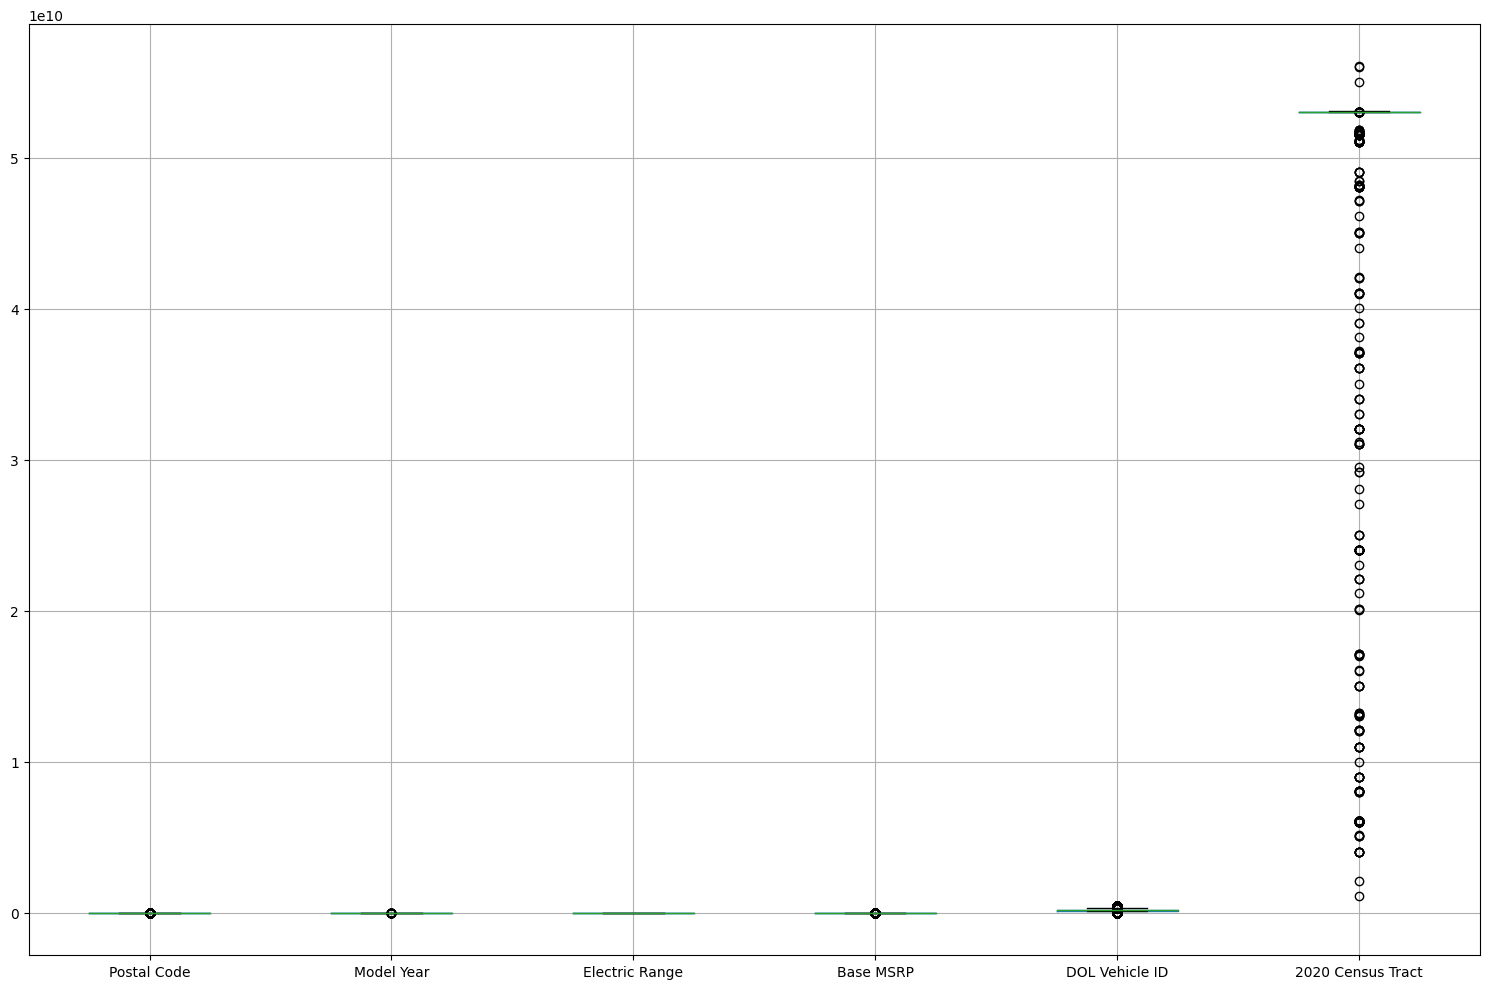

In [17]:
# Boxplots for numerical features
df.boxplot(figsize=(15, 10))
plt.tight_layout()
plt.show()

## BIVARIATE ANALYSIS

In [18]:
# Numerical vs Numerical and Categorical vs Numerical

def bivariate_categorical_numerical(data, cat_col, num_col):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=cat_col, y=num_col, data=data, palette='Set2')
    plt.title(f"{num_col} by {cat_col}")
    plt.xticks(rotation=90)
    plt.show()

In [19]:
def bivariate_numerical(data, col1, col2):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=col1, y=col2, data=data)
    plt.title(f"{col1} vs {col2}")
    plt.show()

<ipython-input-18-c8d2522518e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=data, palette='Set2')


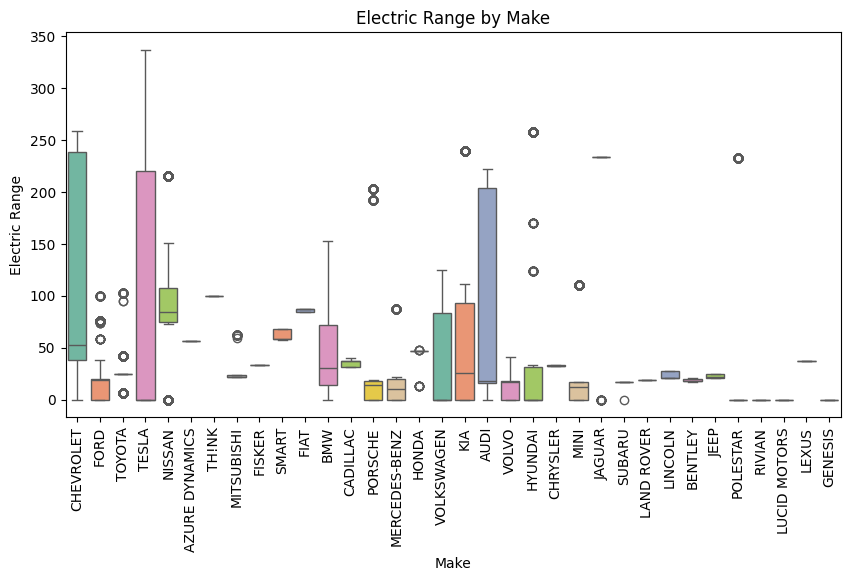

In [20]:
bivariate_categorical_numerical(df, 'Make', 'Electric Range')

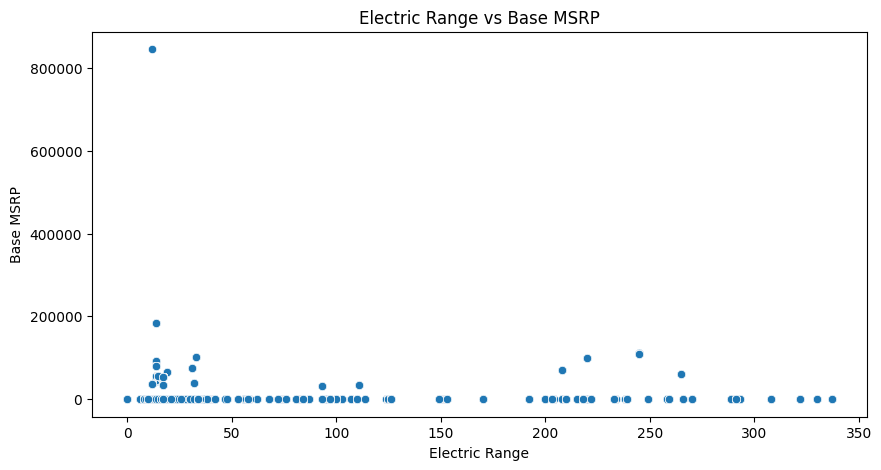

In [21]:
bivariate_numerical(df, 'Electric Range', 'Base MSRP')

## MULTIVARIATE ANALYSIS

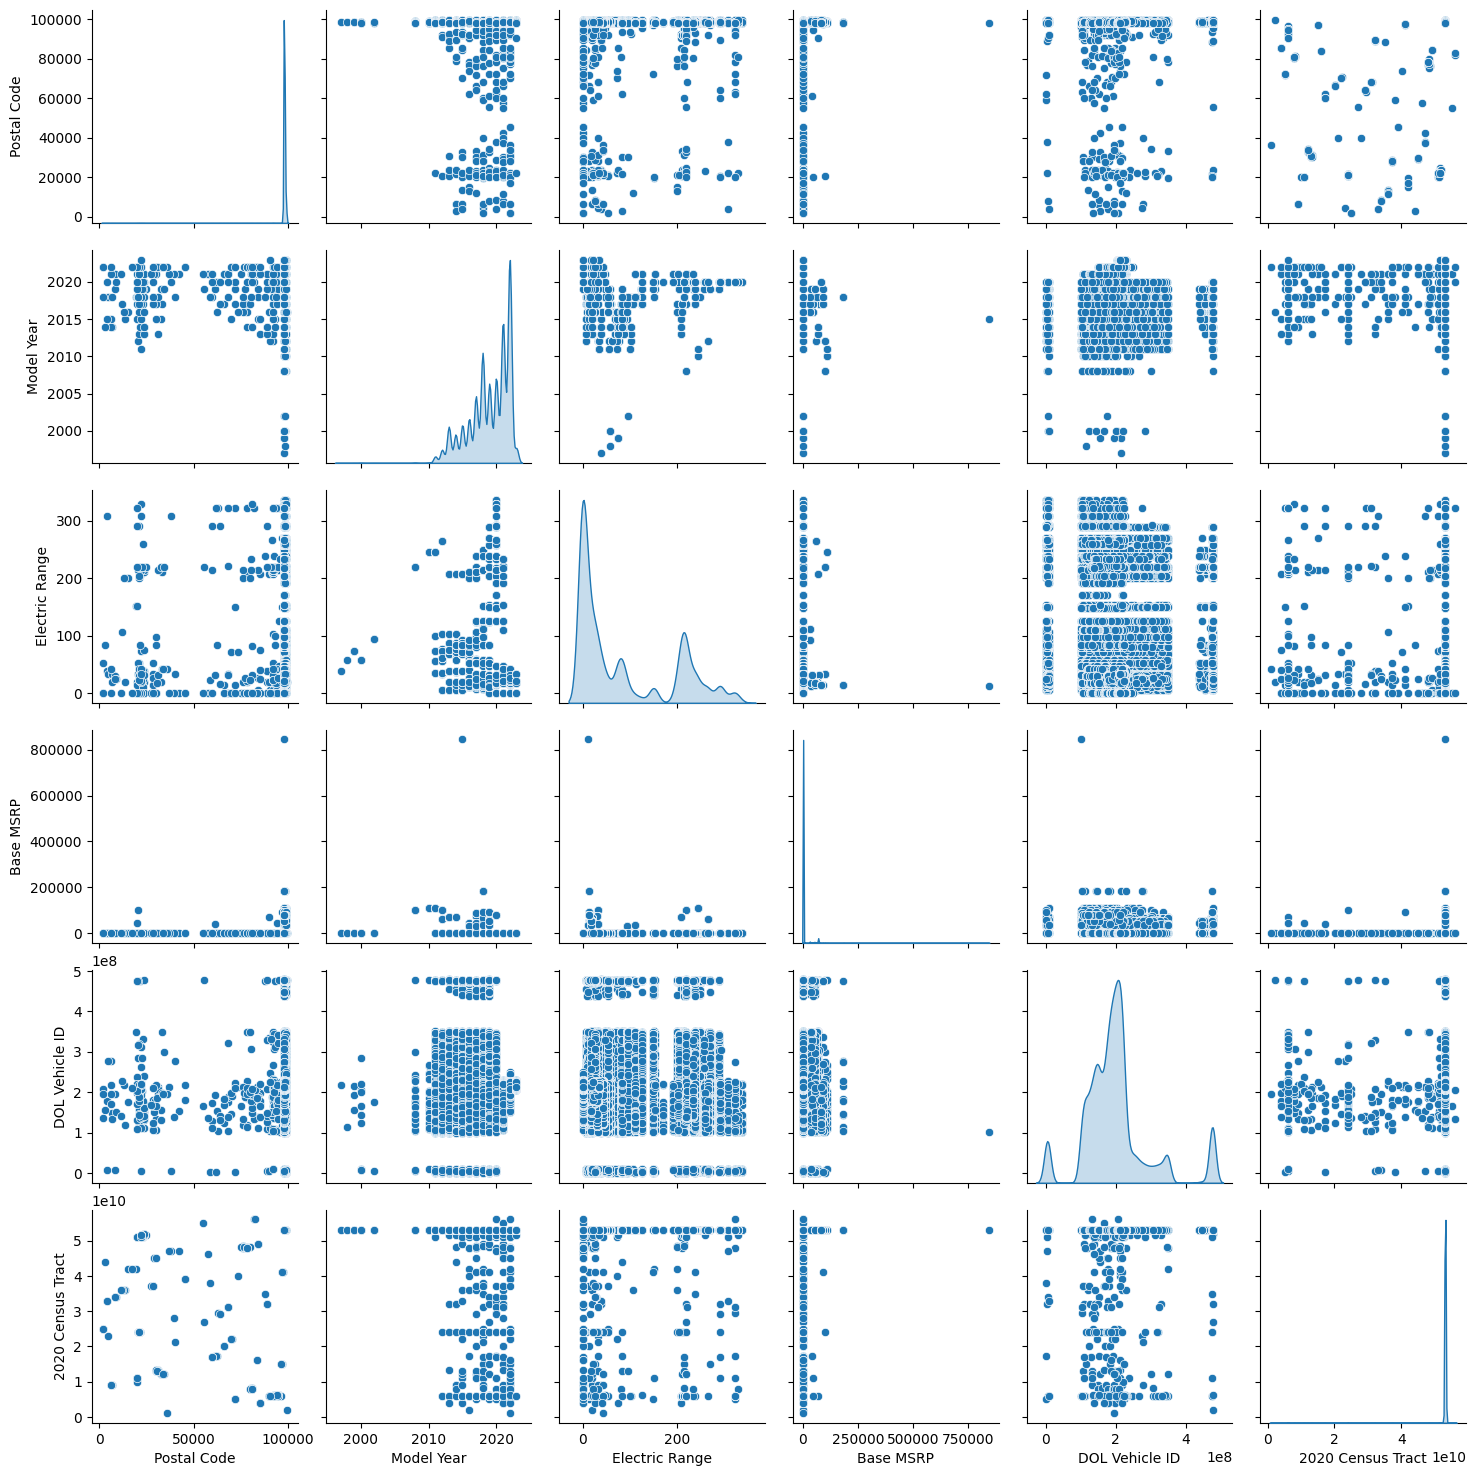

In [22]:
#Pair plot for numerical columns
sns.pairplot(df,diag_kind='kde')
plt.show()

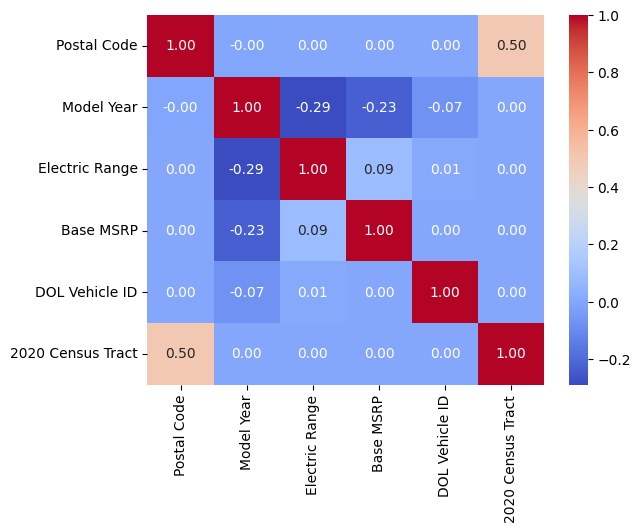

In [23]:
#Plot correlation of the numerical columns
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm', fmt='.2f')
plt.show()

In [24]:
import plotly.express as px

ev_count_by_state = df.groupby('State').size().reset_index(name='EV Count')

# Choropleth map using Plotly Express
fig = px.choropleth(ev_count_by_state,
                    locations='State',  # Column with geographical info (e.g., 'State')
                    locationmode='USA-states',  # Restricting to US states
                    color='EV Count',  # Column with the number of EVs
                    color_continuous_scale='Viridis',
                    scope='usa',  # Limiting the map to USA
                    title="Number of Electric Vehicles (EVs) by State")

# Update layout to make the map look better
fig.update_layout(geo=dict(
    showlakes=True,  # Show lakes in the map
    lakecolor='rgb(255, 255, 255)'),  # Lake color
    title_x=0.5)  # Center the title

# Show the plot
fig.show()

In [26]:
pip install bar_chart_race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.0 MB/s eta 0:00:00


In [42]:
import bar_chart_race as bcr

# Group by 'Make' and 'Model Year' and count the number of vehicles per make each year
ev_make_per_year = df.groupby(['Model Year', 'Make']).size().unstack(fill_value=0)

# Create the bar chart race animation
# Create the bar chart race animation
bcr.bar_chart_race(
    df=ev_make_per_year,  # DataFrame with makes as rows and years as columns
    filename=None,  # None means the animation will be shown in a Jupyter notebook, set a path to save it as a file (e.g., 'race.mp4')
    orientation='h',  # Horizontal bars
    sort='desc',  # Sort bars in descending order
    n_bars=10,  # Number of bars to display
    fixed_order=False,  # Allow dynamic ordering of bars as values change
    fixed_max=True,  # Keep the x-axis fixed to the maximum value
    steps_per_period=10,  # Smoothness of the animation
    interpolate_period=False,  # Linear interpolation between periods
    period_length=1900,  # Duration of each period (in ms)
    period_label={'x': .99, 'y': .25, 'ha': 'right'},  # Positioning of the period/year label
    title='Electric Vehicle Make Count Over the Years',
    bar_size=.55,  # Thickness of the bars
    tick_label_size=7,  # Size of the labels
    label_bars=True,  # Display the bar values
    figsize=(8, 6),  # Size of the figure
    dpi=144,  # Quality of the animation
    cmap='dark24'  # Color map for the bars
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

